<a href="https://colab.research.google.com/github/linusms/Hands-on/blob/main/chapter_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

X_new=np.array([[0],[2]])
X_new_b=np.c_[np.ones((2,1)),X_new]
print(X_new_b)

[[1. 0.]
 [1. 2.]]


In [2]:
X_b = np.c_[np.ones((100, 1)), X]  # 모든 샘플에 x0 = 1 추가
X_b[:5]

array([[1.        , 0.172338  ],
       [1.        , 1.60319138],
       [1.        , 0.12431458],
       [1.        , 1.87616446],
       [1.        , 0.45141974]])

In [3]:
# 배치 경사 하강법
# 매 스텝마다(iteration) 그래디언트 계산하고 있음

eta = 0.1                     # 학습률
n_iterations = 1000           # 1000번 파라미터 조정
m = 100                       # 샘플 수

theta = np.random.randn(2,1)  # 파라미터 무작위 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)   # 비용 함수 그레이디언트
    theta = theta - eta * gradients

In [4]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")    # 훈련 세트 산점도
    
    n_iterations = 1000     # 1000번 반복 훈련
    for iteration in range(n_iterations):
        
        # 초반 10번 선형 모델(직선) 그리기
        if iteration < 10:                         
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        
        # 파라미터 조정
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        
        # 조정되는 파라미터를 모두 리스트에 저장 (theta_path=None 옵션이 아닌 경우)
        if theta_path is not None:
            theta_path.append(theta)
            
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

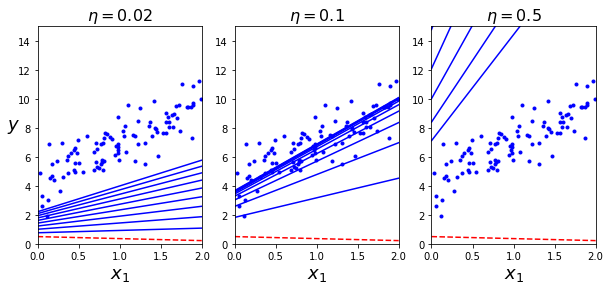

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

np.random.seed(42)
theta = np.random.randn(2,1)  # 무작위 초기화

plt.figure(figsize=(10,4))    # 도표 크기 지정

# eta=0.02
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)

# eta=0.1
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)

# eta=0.5
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

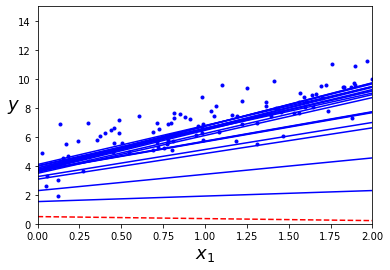

In [6]:
theta_path_sgd = []

m = len(X_b)
np.random.seed(42)


n_epochs = 50   # 에포크 수
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)    # 파라미터 랜덤 초기화

for epoch in range(n_epochs):
    
    # 매 샘플에 대해 그레이디언트 계산 후 파라미터 업데이트
    for i in range(m):
        
        # 처음 20번 선형 모델(직선) 그리기
        if epoch == 0 and i < 20:                    
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)        
            
        # 파라미터 업데이트
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)  # 하나의 샘플에 대한 그레이디언트 계산
        eta = learning_schedule(epoch * m + i)        # 학습 스케쥴을 이용한 학습률 조정
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 

plt.plot(X, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                                                         
plt.show()                                           

In [7]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [8]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.20718609]), array([2.76986321]))

In [9]:
np.random.seed(42)

# m: 샘플개수, X: 샘플 데이터값 y: 이차방정식을 따르는 레이블값 
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [10]:
# 특성이 한 개인 비선형데이터에 선형회귀를 이용하는 방법 : 다항회귀
# PolynomialFeatures 이용

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# 훈련 데이터셋에 특성이 하나 추가된 것을 볼 수 있음 (제곱된 값?)
print(X[0], X_poly[0])

[-0.75275929] [-0.75275929  0.56664654]


[1.78134581] [[0.93366893 0.56456263]]


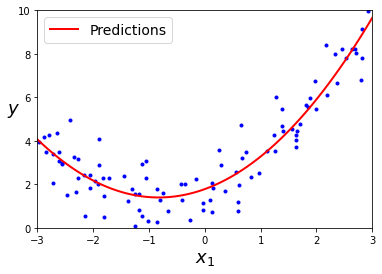

In [11]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
# 순서대로 선형회귀의 절편, 선형회귀의 기울기(다항회귀에서는 하나 추가됨)
print(lin_reg.intercept_, lin_reg.coef_)


X_new=np.linspace(-3, 3, 100).reshape(100, 1)     # 새로운 샘플 100개
X_new_poly = poly_features.transform(X_new)       # 2차 다항 회귀 모델 데이터로 변환
y_new = lin_reg.predict(X_new_poly)               # 예측하기

plt.plot(X, y, "b.")                                            # 기존 데이터 산점도
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")  # 예값 그래프

plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error           # MSE 수동 계산
from sklearn.model_selection import train_test_split     # 무작위 샘플링

def plot_learning_curves(model, X, y):
    # 8:2 로 분류
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []                    # MSE 추적 장치

    for m in range(1, len(X_train)):                     # m 개의 훈련 샘플을 대상으로 훈련
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        # MSE 기록
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)  
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)   

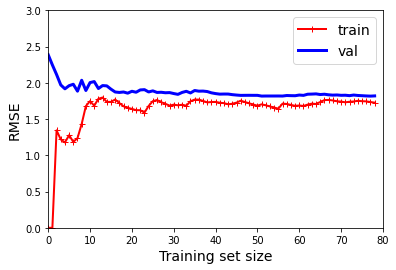

In [13]:
# 과소적합의 예시
# 1. 훈련 세트가 적을때 오차가 매우 적고, 세트가 커질수록 오차도 커짐 
# 2. 꽤 높은 오차에서 매우 가까이 근접하고 두 곡선이 수평함 
# 데이터 수 증가로 효과 없음. 더 복잡한 모델 사용해야 함

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                        
plt.show()                         

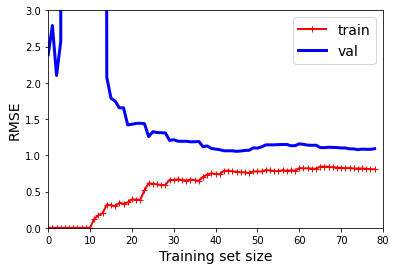

In [14]:
# 과대적합의 예시
# 1. 훈련 데이터의 오차가 검증 데이터에 비해 매우 낮음
# 2. 두 곡선 사이에 공간이 큼
# 해결 방법 중 한가지는 훈련 데이터 추가

from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           
plt.show()                        

In [15]:
np.random.seed(42)

m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5     # 1차 선형회귀 모델을 따로도록 함. 단, 잡음 추가됨.
X_new = np.linspace(0, 3, 100).reshape(100, 1)    # 0~3 구간에서 균등하게 100개의 검증 데이터 선택

In [16]:
# alpha: 규제 강도. 클 수록 규제가 세짐
# 비용함수에 포함되는 규제항의 계수이므로, 비용 함수값을 줄이기 위해
# 가중치 벡터들이 작아지도록 강요되기 때문
# solver=sag : 확률적 '평균' 경사 하강법. 경사하강법 지원하는 옵티마이저 중 하나

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

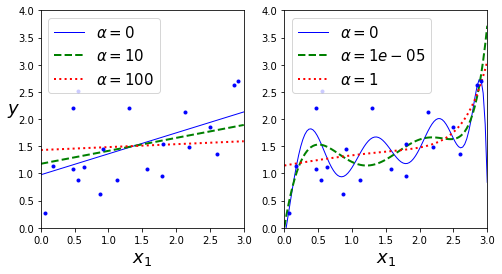

In [17]:
# 알파 값이 커질수록 다리미로 핀 것처럼 곡선이 평평 

from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),           # 표준화 축척 조정
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()

In [18]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

# 5:5로 훈련/검증 세트로 분할
X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [19]:
from copy import deepcopy

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

# 모델 생성시 warm_start=True로 두면 epoch이 반복시 전 반복에서 나온 파라미터 이용
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # 중지된 곳에서 다시 시작합니다
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

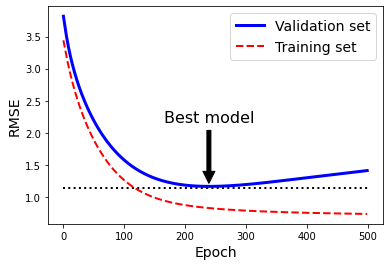

In [20]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500

train_errors, val_errors = [], []                    # 훈련/검증 모델 성능 기록 장치

for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)        # warm_start=True 이기에 학습결과를 이어감.
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))  # 훈련/검증모델 성능 기록
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)                  # 최고 성능의 모델 기억해두기
best_val_rmse = np.sqrt(val_errors[best_epoch])

# 아래부터는 그래프 그리는 코드임.

plt.annotate('Best model',                          # 도표에 문장 넣는 기능. 내용과 위치를 정확히 지정함.
             xy=(best_epoch, best_val_rmse),        # 색상, 폰트 크기 등등을 일일이 지정함.
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # 검정 실선을 잘 보여주기 위해서임.
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)  # 수평 검정 점선
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")    # 파랑 실선
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")   # 빨강 파선

# 기타 추가 정보
plt.legend(loc="upper right", fontsize=14)  # 범례
plt.xlabel("Epoch", fontsize=14)            # 축 정보
plt.ylabel("RMSE", fontsize=14)
plt.show()

In [39]:
from sklearn import datasets
iris = datasets.load_iris()
X=iris['data'][:,3:]
y=(iris['target']==2).astype(int)

In [29]:
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

(1000, 1)


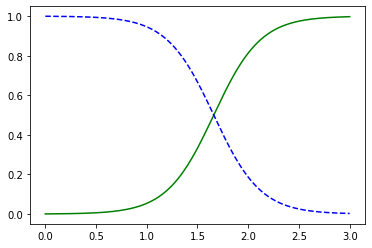

In [35]:
# 2cm가 넘으면 virginica가 맞다고 강하게 확신
# 1cm보다 작으면 virginica가 아니라고 강하게 확신
# 애매한 중간 부분, 클래스의 결정 경계는 1.6cm

X_new=np.linspace(0,3,1000).reshape(-1,1)
print(X_new.shape)
y_proba=log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1], 'g-', label='Iris virginica')
plt.plot(X_new, y_proba[:,0], 'b--', label='Not Iris virginica')

In [40]:
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

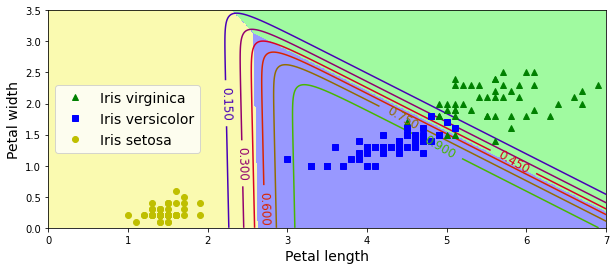

In [41]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))

#레이블이 2인(y==2) X의 행 인덱스, 1번째 열을 x축 데이터로
# 2번째 열을 y축 데이터로 두고 산점도 그래프
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])

plt.show()